In [82]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq

penguins_cytb = "penguins_cytb.fasta" 

def get_sequences_from_file(filename):
    sequence_data_dict = {}
    for record in SeqIO.parse(filename, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict


sequences = get_sequences_from_file(penguins_cytb)

print(sequences)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

#### penguins_cytb = "penguins_cytb.fasta":

Defining a variable called "penguins_cytb" to "penguins_cytb.fasta" and assigning it the value of  "penguins_cytb.fasta". This variable is then used as an argument in the get_sequences_from_file() function, which reads in the FASTA file containing DNA sequences for multiple penguin species.

#### def get_sequences_from_file(filename):
      sequence_data_dict = {}
get_sequences_from_file initializes an empty dictionary called sequence_data_dict, which will be used to store the sequences for each species.

#### for record in SeqIO.parse(filename, "fasta"): 
continue to build the function by adding a for loop. This for loop iterates over each record in the FASTA file produced by the seqI0.parse function which In the context of sequence data, parsing typically involves reading a sequence file, such as a FASTA or FASTQ file, and extracting the sequence data and associated metadata, such as sequence IDs or annotations. 


#### description = record.description.split()

By calling split() on the description string, we can split it into a list of words and extract specific pieces of information from it. Empty split () means splitting words by white space.

#### species_name = description[1] + " " + description[2]
#### sequence_data_dict[species_name] = record.seq

Creating a new key-value pair in the sequence_data_dict dictionary. The key is the species_name string, which we constructed earlier by combining the second and third words in the description string. The value is the sequence data itself, which is stored in the seq attribute of the SeqRecord object. By doing this, we are creating a mapping between each species name and its corresponding sequence data


#### sequences = get_sequences_from_file(penguins_cytb)

In the line sequences = get_sequences_from_file(penguins_cytb), we are calling the get_sequences_from_file() function and passing it the penguins_cytb variable as an argument. The get_sequences_from_file() function reads the sequence data from this file and returns a dictionary that maps each species name to its corresponding DNA sequence data. By assigning the result of this function call to the sequences variable, we are storing this dictionary in memory for later use.


#### print(sequences)

Returning the value of the sequences variable



In [83]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq_obj = Seq(string_nucleotides, None)
    aa_seq_string = ""
    for i in range(0, len(seq_obj), 3):
        codon = seq_obj[i:i+3]
        if len(codon) == 3:
            if codon in mito_table.stop_codons:
                break
            aa = mito_table.forward_table[codon]
            aa_seq_string += aa
    return aa_seq_string

for species_name, seq in sequences.items():
    aa_seq = translate_function(str(seq))
    print(species_name + ": " + aa_seq)

Aptenodytes forsteri: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
Aptenodytes patagonicus: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
Eudyptes chrysocome: MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFS

#### def translate_function(string_nucleotides):

Defining a translate function with the function's arguments (string_nucleotides). "string_nucleotides" is  a variable name used within the context of the translate_function function, and its value is determined.  when the function is called, the value of the string_nucleotides parameter is passed as an argument

#### mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 

#### ref: https://biopython.org/docs/1.75/api/Bio.Data.CodonTable.html
Creating a varaialbe (mito_table) in the function containing the genetic code that is being accessed for the "Vertebrate Mitochondrial" , which is stored in the CodonTable.unambiguous_dna_by_name dictionary.

#### seq_obj = Seq(string_nucleotides, None)
#### Ref: https://biopython.org/wiki/Seq

Creating a varaialbe (seq_obj) having the value of the seq function on the argument "string_nucleotides" defined earlier. 
"Seq" converts the string of nucleotides into a sequence object that can be easily manipulated using Biopython's sequence analysis tools.

#### aa_seq_string = ""

This line of code initializes an empty string variable called aa_seq_string, which will be used to store the translated amino acid sequence

#### for i in range(0, len(seq_obj), 3): 
#### ref: https://pynative.com/python-range-function/

The for loop iterates over a range of numbers generated by the range function. The range function takes three arguments: a starting value (0 in this case), an ending value (the length of seq_obj), and a step value (3 in this case, to iterate over the sequence in codons of three nucleotides). on the first iteration of the loop, i will be 0, which represents the starting index of the first codon in the sequence. On the second iteration, i will be 3, which represents the starting index of the second codon in the sequence, and so on. In Python, as in many programming languages, indexing starts at 0. Therefore, the first nucleotide in the input nucleotide sequence would be at index 0, the second nucleotide would be at index 1, and so on.

#### codon = seq_obj[i:i+3] 
#### ref(slicing): https://stackoverflow.com/questions/509211/how-slicing-in-python-works

This line of code creates a new variable codon by slicing the input nucleotide sequence seq_obj into groups of three nucleotides

#### if len(codon) == 3:

The condition if len(codon) == 3 checks whether the length of the current codon is equal to 3 nucleotides. If the length of codon is not 3, it means that we have reached the end of the input sequence and there are not enough nucleotides to form a complete codon. By checking if len(codon) == 3, we ensure that we only attempt to translate complete codons of three nucleotides, and we avoid attempting to translate partial codons that would result in errors or incorrect translation.


#### if codon in mito_table.stop_codons: 
                break                  
                
#### ref(nested if statements): https://www.softwaretestinghelp.com/python/python-conditional-statements/#4_Nested_if-else_statements
The indentation between the two if statements is used to indicate that the second if statement is nested inside the first if statement. Within this block of code, we have a second if statement that checks whether the current codon is a stop codon. If this condition is true, the break statement is executed, which immediately terminates the loop and exits the function.

#### aa = mito_table.forward_table[codon]
#### aa_seq_string += aa

translates the current codon into its corresponding amino acid using the Vertebrate Mitochondrial genetic code. By iterating over the input nucleotide sequence and translating each codon into its corresponding amino acid, we can obtain the complete amino acid sequence of the protein encoded by the input sequence.

We use the += operator with the aa_seq_string variable to append the translated amino acid to the existing amino acid sequence in aa_seq_string, rather than overwriting it


#### for species_name, seq in sequences.items():
    aa_seq = translate_function(str(seq))
    print(species_name + ": " + aa_seq)
    
#### Ref(calling defined function): https://www.javatpoint.com/how-to-call-a-function-in-python
#### Ref ( prinitng key, value using for loop): https://www.freecodecamp.org/news/python-for-loop-example-how-to-write-loops-in-python/
    
Calling the defined function on the "sequences" variable and creating a new variable (aa_seq) that contains the translated sequences. For loop is to iterate over each species_name, sequence pair and prent them all, otherwise and if only the last line was run only the first sequence will be printed. The str function is to creat a string. 










In [84]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq_obj = Seq(string_nucleotides, None)
    aa_seq = seq_obj.translate(table=mito_table, to_stop=True)
    return str(aa_seq)
for species_name, seq in sequences.items():
    aa_seq = translate_function(seq)
    print(species_name + ": " + aa_seq)

Aptenodytes forsteri: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
Aptenodytes patagonicus: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
Eudyptes chrysocome: MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFS

##### def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]


Same explanation as the last code

##### seq_obj = Seq(string_nucleotides, None)
This line creates a Seq object called seq_obj from the input string_nucleotides, which is the nucleotide sequence to be translated. The second argument, None, specifies that the sequence does not have an associated alphabet.


#### aa_seq = seq_obj.translate(table=mito_table, to_stop=True)
    return str(aa_seq)
    
#### ref: https://biopython.org/docs/1.75/api/Bio.Seq.html#Bio.Seq.Seq.translate
This line calls the translate() method of the Seq object to translate the nucleotide sequence into an amino acid sequence. The table argument specifies the codon table to use for translation, and to_stop=True specifies that translation should stop at the first stop codon encountered.


#### for species_name, seq in sequences.items():
Starts a for loop that iterates over the items in the sequences dictionary. The items() method returns a list of key-value pairs in the dictionary, where each key-value pair is a tuple containing the key and its corresponding value.


#### aa_seq = translate_function(seq)
Calls the translate_function() on the nucleotide sequence seq for the current key-value pair in the sequences dictionary. The translate_function() returns the amino acid sequence for the nucleotide sequence using the "Vertebrate Mitochondrial" codon table. The resulting amino acid sequence is assigned to the variable aa_seq.


#### print(species_name + ": " + aa_seq)
This line prints the species name, a colon and a space, and the corresponding amino acid sequence for the current key-value pair in the sequences dictionary. The + operator is used to concatenate the strings together. The output is printed to the console.

In [85]:
gc_contents = {}
for species_name, seq in sequences.items():
    sequence = str(seq).upper()
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = gc_count / len(sequence)
    gc_contents[species_name] = gc_content
for species_name, gc_content in gc_contents.items():
    print(species_name, gc_content)

Aptenodytes forsteri 0.48381452318460194
Aptenodytes patagonicus 0.4969378827646544
Eudyptes chrysocome 0.5118110236220472
Eudyptes chrysolophus 0.5091863517060368
Eudyptes sclateri 0.5083114610673666
Eudyptula minor 0.4925634295713036
Pygoscelis adeliae 0.49081364829396323
Pygoscelis antarctica 0.4776902887139108
Pygoscelis papua 0.4715660542432196
Spheniscus demersus 0.48293963254593175
Spheniscus humboldti 0.4925634295713036
Spheniscus magellanicus 0.4820647419072616


#### gc_contents = {} 

Initialize an empty dictionary to store the GC-content of each sequence. {}: This syntax is used to create an empty dictionary

#### for species_name, seq in sequences.items(): 
#### ref: https://docs.python.org/3/tutorial/datastructures.html#dictionaries (point 5.6)

items() is a method in Python that returns a view object that contains the key-value pairs of a dictionary. In this case, sequences is a dictionary where the keys are the species names and the values are their corresponding nucleotide sequences.

By using sequences.items(), we can iterate over each key-value pair in the dictionary and assign the key to the variable species_name and the value to the variable seq.
Loop over each key-value pair in the sequences dictionary. species_name: This is a variable that stores the name of a species in the sequences dictionary. seq: This is a variable that stores the DNA sequence for a given species in the sequences dictionary



####  sequence = str(seq).upper() 

Extract the DNA sequence as a string and convert to uppercase. The str() function is used to convert this Seq object to a string. This is because the upper() method can be applied only to strings and not to Seq objects. 


#### gc_count = sequence.count('G') + sequence.count('C') 
#### ref(count,len): https://biopython.org/docs/1.75/api/Bio.Seq.html

Count the number of G and C nucleotides in the sequence, sequence.count() is a built-in method in Python that counts the number of occurrences of a substring within a string. 



#### gc_content = gc_count / len(sequence) 
#### ref(count,len): https://biopython.org/docs/1.75/api/Bio.Seq.html
Calculate the GC-content as a proportion. len(): This function is used to return the length of a string


#### gc_contents[species_name] = gc_content 
#### ref (adding key value pair): https://stackoverflow.com/questions/3776275/how-to-add-key-value-pair-to-dictionary

Add the species name and its corresponding GC-content to the gc_contents dictionary. gc_contents[species_name]: This syntax is used to add a key-value pair to the gc_contents dictionary.

#### for species_name, gc_content in gc_contents.items(): 
             print(species_name, gc_content)
#### ref ( prinitng key, value using for loop): https://www.freecodecamp.org/news/python-for-loop-example-how-to-write-loops-in-python/
Loop over each key-value pair in the gc_contents dictionary and print the species_name, gc_content.   



    

In [86]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def calculate_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    molecular_weight = analysed_seq.molecular_weight()
    return molecular_weight

for species_name, seq in sequences.items():
    aa_seq = translate_function(str(seq))
    molecular_weight = calculate_molecular_weight(aa_seq)
    print(species_name + ": " + str(molecular_weight))

Aptenodytes forsteri: 42459.602100000004
Aptenodytes patagonicus: 42563.70669999999
Eudyptes chrysocome: 42475.5753
Eudyptes chrysolophus: 42445.54929999999
Eudyptes sclateri: 42475.5753
Eudyptula minor: 42491.64080000001
Pygoscelis adeliae: 42458.61400000001
Pygoscelis antarctica: 42404.54230000001
Pygoscelis papua: 42595.87590000001
Spheniscus demersus: 42431.54900000002
Spheniscus humboldti: 42399.55200000001
Spheniscus magellanicus: 42459.60210000002


#### Similar explanation as previous codes. 

In [87]:
penguin_data = pd.read_csv("penguins_mass.csv")
penguin_data["molecular weight"] = float('NaN')
penguin_data["GC content"] = float('NaN')
print(penguin_data)

                    species   mass  molecular weight  GC content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


#### penguin_data = pd.read_csv("penguins_mass.csv")

This line reads in a CSV file called "penguins_mass.csv" using the read_csv() function from the Pandas library. The resulting data is assigned to a variable called penguin_data

#### penguin_data["molecular weight"] = float('NaN')
#### ref (adding key value pair): https://stackoverflow.com/questions/3776275/how-to-add-key-value-pair-to-dictionary
#### ref (float('NaN')): https://emeritus.org/blog/coding-learn-what-is-a-float-in-python/
This line creates a new column in the penguin_data dataframe called "molecular weight" and initializes all the values to NaN (Not a Number). This is a placeholder value that will be replaced with actual molecular weights calculated later.

#### penguin_data["GC content"] = float('NaN')
#### ref (adding key value pair): https://stackoverflow.com/questions/3776275/how-to-add-key-value-pair-to-dictionary
#### ref (float('NaN')): https://emeritus.org/blog/coding-learn-what-is-a-float-in-python/
This line creates a new column in the penguin_data dataframe called "GC content" and initializes all the values to NaN (Not a Number). This is a placeholder value that will be replaced with actual GC content calculated later.


#### print(penguin_data)
This line prints the entire penguin_data dataframe to the console. The output shows the data for each penguin, including its species, island, bill length, bill depth, flipper length, body mass, sex, molecular weight, and GC content. The molecular weight and GC content columns are currently filled with NaN values.


#### When adding keys (or columns) to a DataFrame:

the default behavior is to add them as new columns to the existing DataFrame.


#### The single quotes (' ') are used to represent a string.

In this case, the string being represented is 'NaN', which stands for "Not a Number" and is used to indicate missing or undefined values. 

In [88]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

sequences = get_sequences_from_file(penguins_cytb)

for species_name, seq in sequences.items():
    aa_seq = translate_function(str(seq))
    molecular_weight = calculate_molecular_weight(aa_seq)
    penguin_data.loc[penguin_data["species"] == species_name, "molecular weight"] = molecular_weight

gc_contents = {}
for species_name, seq in sequences.items():
    sequence = str(seq).upper()
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = gc_count / len(sequence)
    gc_contents[species_name] = gc_content
for species_name, gc_content in gc_contents.items():
    penguin_data.loc[penguin_data["species"] == species_name, "GC content"] = gc_content
    
print(penguin_data)

                    species   mass  molecular weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021    0.483815
1   Aptenodytes patagonicus  13.40        42563.7067    0.496938
2       Eudyptes chrysocome   2.80        42475.5753    0.511811
3     Eudyptes chrysolophus   4.50        42445.5493    0.509186
4         Eudyptes sclateri   4.25        42475.5753    0.508311
5           Eudyptula minor   1.60        42491.6408    0.492563
6        Pygoscelis adeliae   4.60        42458.6140    0.490814
7     Pygoscelis antarctica   4.10        42404.5423    0.477690
8          Pygoscelis papua   6.10        42595.8759    0.471566
9       Spheniscus demersus   3.20        42431.5490    0.482940
10     Spheniscus humboldti   4.75        42399.5520    0.492563
11  Spheniscus magellanicus   3.40        42459.6021    0.482065


#### for species_name, seq in sequences.items():
    aa_seq = translate_function(str(seq))
This starts a for loop that iterates over the key-value pairs in the sequences dictionary. For each key-value pair, it converts the nucleotide sequence (seq) to a string using the str function and calls the translate_function() to translate it to an amino acid sequence (saved in "aa_seq").


#### molecular_weight = calculate_molecular_weight(aa_seq)
#### penguin_data.loc[penguin_data["species"] == species_name, "molecular weight"] = molecular_weight
#### ref (pandas.DataFrame.loc): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
This calculates the molecular weight of the amino acid sequence (aa_seq) using a function called calculate_molecular_weight(), and assigns the result to a variable called molecular_weight. The penguin_data.loc[] syntax is used to select the rows in the penguin_data dataframe where the species column matches the current species_name, and sets the corresponding molecular weight values to the molecular_weight variable.



#### gc_contents = {}
#### for species_name, seq in sequences.items():
    sequence = str(seq).upper()
    gc_count = sequence.count('G') + sequence.count('C')
    gc_content = gc_count / len(sequence)
    gc_contents[species_name] = gc_content
This loop calculates the GC content for each nucleotide sequence in the sequences dictionary. It creates an empty dictionary called gc_contents to store the results. For each nucleotide sequence, it converts it to a string and converts all letters to uppercase. It then counts the number of occurrences of 'G' and 'C' in the string (gc_count), calculates the GC content by dividing gc_count by the length of the sequence, and stores the GC content in the gc_contents dictionary with the corresponding species_name


#### for species_name, gc_content in gc_contents.items():
    penguin_data.loc[penguin_data["species"] == species_name, "GC content"] = gc_content
#### ref (pandas.DataFrame.loc): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
This loop updates the GC content column in the penguin_data dataframe with the GC content values calculated in the previous loop. For each species in the gc_contents dictionary, it selects the rows in the penguin_data dataframe where the species column matches the current species_name, and sets the corresponding GC content values to the GC content value stored in the gc_contents dictionary.


#### print(penguin_data)
This line prints the entire penguin_data dataframe to the console. The output shows the data for each penguin.

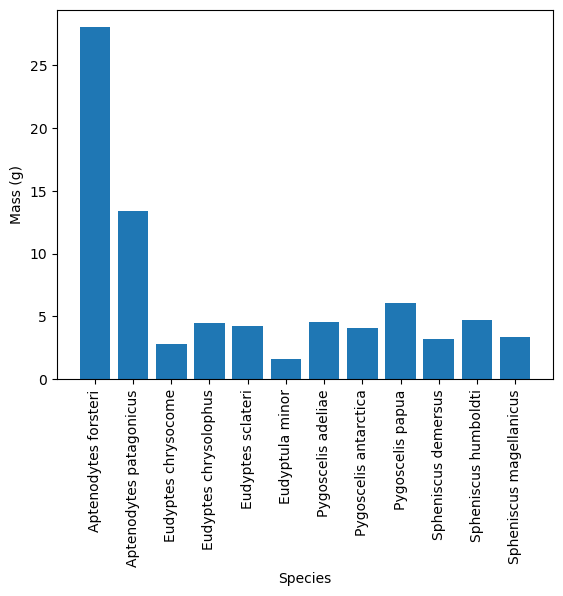

In [89]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.bar(penguin_data["species"], penguin_data["mass"])


ax.set_xlabel("Species")


ax.set_ylabel("Mass (g)")


plt.xticks(rotation=90)


plt.show()

#### import matplotlib.pyplot as plt 

import is a Python keyword used to import a library or module. matplotlib.pyplot is the sub-library that provides
a simple interface for creating plots and charts.


#### fig, ax = plt.subplots() 
#### ref: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

This creates a new figure and axes object for plotting. The fig variable represents the entire figure, while the ax variable represents a specific subplot within the figure. fig, ax is a tuple that is unpacked into two variables (fig and ax) using Python's tuple unpacking feature. plt.subplots() is a method that creates a new figure object and one or more subplot objects, and returns them as a tuple.


#### ax.bar(penguin_data["species"], penguin_data["mass"]) -
#### ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

This creates a bar chart using the data in the penguin_data dataframe. The species column is used as the x-axis, while the mass column is used as the y-axis. ax.bar() is a method that creates a bar chart on the given axes object. penguin_data["species"] and penguin_data["mass"] are DataFrame columns that contain the data to be plotted.


#### ax.set_xlabel("Species") 
#### ref :https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
This sets the label for the x-axis of the plot to "Species".

#### ax.set_ylabel("Mass (g)") 
This sets the label for the y-axis of the plot to "Mass (g)". 


#### plt.xticks(rotation=90) 
#### ref (Rotate Y-Axis Tick Labels in Matplotlib): https://stackabuse.com/rotate-axis-labels-in-matplotlib/

This rotates the x-axis tick labels by 90 degrees to make them easier to read.

#### plt.xticks()

is a method that sets the tick values and labels of the x-axis of the current plot. rotation=90 is an optional parameter that rotates the tick labels by 90 degrees.


#### plt.show() 
This displays the plot on the screen. 

In [51]:
smallest_species = penguin_data.sort_values("mass").iloc[0]["species"]
print("The smallest penguin species is:", smallest_species)

The smallest penguin species is: Eudyptula minor


#### smallest_species = penguin_data.sort_values("mass").iloc[0]["species"] 
This line of code finds the smallest penguin species by sorting the penguin_data dataframe by the mass column and selecting the first row (which has the smallest mass). The iloc method is used to select the first row, and the ["species"] syntax is used to extract the value of the species column for that row. The result is assigned to the smallest_species variable.

#### sort_values("mass")
#### ref (sort): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
is a Pandas dataframe method that sorts the rows of the dataframe in ascending order by the values in the mass column.


#### iloc[0] 
#### ref(iloc[0] ): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
is a Pandas dataframe method that selects the first row of the sorted dataframe.


#### ["species"] 
is a Pandas dataframe indexing syntax that selects the value of the species column for the selected row.


#### print("The smallest penguin species is:", smallest_species)
#### ref( print variable and string separated by comma): https://www.freecodecamp.org/news/python-print-variable-how-to-print-a-string-and-variable/

This line of code prints a message to the console that indicates the smallest penguin species. 
"The smallest penguin species is:" is a string literal that is printed to the console along with the value of smallest_species.







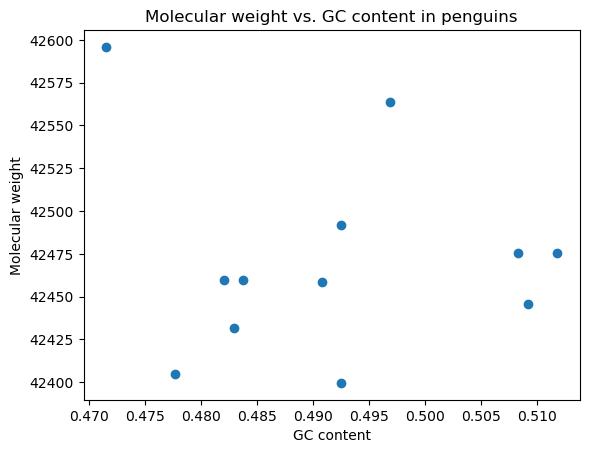

In [90]:
import matplotlib.pyplot as plt


gc_content = penguin_data["GC content"]
mol_weight = penguin_data["molecular weight"]


plt.scatter(gc_content, mol_weight)
plt.xlabel("GC content")
plt.ylabel("Molecular weight")
plt.title("Molecular weight vs. GC content in penguins")


plt.show()

#### import matplotlib.pyplot as plt 
Imports the pyplot module of the matplotlib library and aliases it as plt. This module provides functions for creating plots and visualizations in Python.
as is a Python keyword used to create an alias for a library or module.

#### gc_content = penguin_data["GC content"]
Assigns the values of the GC content column in the penguin_data dataframe to the gc_content variable.

#### mol_weight = penguin_data["molecular weight"]
Assigns the values of the molecular weight column in the penguin_data dataframe to the mol_weight variable.

#### plt.scatter(gc_content, mol_weight) 
#### ref :https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
Creates a scatter plot of mol_weight on the y-axis and gc_content on the x-axis using the scatter function from the pyplot module.
plt.scatter is a function that creates a scatter plot of x-y data points.
gc_content is the x-axis data for the scatter plot.
mol_weight is the y-axis data for the scatter plot.

#### plt.xlabel("GC content")
Adds a label ("GC content") to the x-axis of the plot.

####  plt.ylabel("Molecular weight") 
Adds a label ("Molecular weight")  to the y-axis of the plot.

#### plt.title("Molecular weight vs. GC content in penguins") 
Adds a title to the plot.
plt.title is a function that sets the title of the plot.

#### plt.show()
Displays the plot on the screen.





In [91]:
penguin_data.to_csv("penguins_mass_cytb.csv", index=False)

#### penguin_data.to_csv("penguins_mass_cytb.csv", index=False)
This line saves the modified penguin data to a CSV (comma-separated values) file named "penguins_mass_cytb.csv" in the current working directory. The data is saved without an index column using the to_csv() method provided by the pandas library.

The index=False argument specifies that the DataFrame index should not be included in the CSV file. This means that the first column of the CSV file will only contain the column names of the DataFrame, and not an additional index column.



### protein mass distribution:

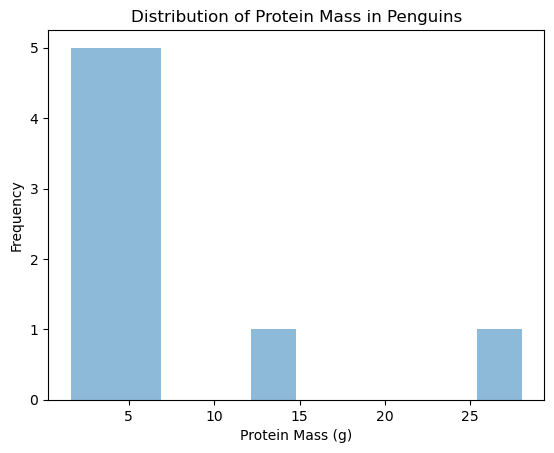

In [92]:
penguin_data = pd.read_csv("penguins_mass_cytb.csv")
mass_data = penguin_data["mass"]
num_bins = 10
plt.hist(mass_data, bins=num_bins, alpha=0.5)
plt.xlabel("Protein Mass (g)")
plt.ylabel("Frequency")
plt.title("Distribution of Protein Mass in Penguins")
plt.show()

#### penguin_data = pd.read_csv("penguins_mass_cytb.csv")
This line loads the penguin data from the penguins_mass_cytb.csv file and stores it in a pandas dataframe called penguin_data.

#### mass_data = penguin_data["mass"]
This line extracts the "mass" column from the penguin_data dataframe and stores it in a variable called mass_data.


#### num_bins = 10
#### ref :https://pythonspot.com/tag/histogram/
This line sets the number of bins to use in the histogram to 10.


#### plt.hist(mass_data, bins=num_bins, alpha=0.5)
#### ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
This line creates the histogram using the plt.hist() function from matplotlib, with mass_data as the input data, num_bins as the number of bins, and alpha=0.5 to set the bars to be semi-transparent.

#### plt.xlabel("Protein Mass (g)")
#### plt.ylabel("Frequency")
#### plt.title("Distribution of Protein Mass in Penguins")
These three lines add x and y axis labels and a plot title to the histogram using the plt.xlabel(), plt.ylabel(), and plt.title() functions, respectively.

#### plt.show()
This line displays the histogram plot.